 ### Setting up: Install required packages

In [107]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt

### Data pre-processing

In [108]:
df=pd.read_csv('https://gist.githubusercontent.com/JishanBSU2018/7c771e4a43f7a17ff7b3eeabc76781e6/raw/c004d096a61291f2b73b23d4e9f76c33b0af454f/Auto.csv',sep='\t')

In [109]:
df["horsepower"] = df.horsepower.convert_objects(convert_numeric=True)

C:\Users\Jishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [110]:
df1=df.drop(['name'], axis=1)

In [111]:
med_mpg=df['mpg'].median()
print (med_mpg)

23.0


### Create a binary variable

In [112]:
def convert_mpg_to_binary(x):
    if x > med_mpg:
        return 1
    else:
        return 0

df1["mpg_median"] = df1["mpg"].apply(convert_mpg_to_binary)

In [113]:
y_binary = df1['mpg_median']
df2 = pd.get_dummies(df1[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'origin']], drop_first=True)

In [114]:
df2.shape

(397, 7)

In [115]:
df2.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'origin'],
      dtype='object')

In [116]:
y_binarynumpy= y_binary.to_numpy()
y=y_binarynumpy.reshape(397,1)

In [117]:
#print(y)

In [118]:
X_new = df2.fillna(df2.mean())

In [119]:
X_new.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
origin          0
dtype: int64

### Data scaling

In [120]:
scaler = StandardScaler()

In [121]:
scaler.fit(X_new)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [122]:
zScaled = scaler.transform(X_new)
#xScaled

In [123]:
ZScaledDF = pd.DataFrame(zScaled, columns=X_new.columns)
ZScaledDF.sample(10)

mpg  cylinders  displacement  horsepower    weight  acceleration  \
189 -1.025579   1.495535      1.059658    0.406569  1.171111     -0.602822   
341 -0.002030   0.318672     -0.196960    0.144784 -0.289622     -1.076146   
378  1.597265  -0.858191     -0.916398   -0.902359 -0.998142      0.635104   
262 -0.552188   1.495535      1.069250    1.061033  0.536985     -0.857689   
296  0.496950  -0.858191     -0.695771   -0.640574 -0.354569     -0.202316   
316 -0.564982   0.318672      0.301850   -0.378788  0.485027      1.144838   
6   -1.217495   1.495535      2.498534    3.024426  1.634010     -2.386891   
86  -1.217495   1.495535      1.059658    1.191926  0.828659     -1.476652   
141  0.701660  -0.858191     -0.916398   -0.562038 -0.887140      0.343828   
198  1.213434  -0.858191     -0.983546   -1.347395 -1.387828      0.671514   

       origin  
189 -0.716507  
341 -0.716507  
378 -0.716507  
262 -0.716507  
296 -0.716507  
316 -0.716507  
6   -0.716507  
86  -0.716507  
141  0.531095  
198  1.778696

In [124]:
X=ZScaledDF.values

In [158]:
print(len(X[0]))

7


### Implementation of a feed forward neural network along with Backpropogation

In [159]:
alphas = [0.001,0.01,0.1]
#alphas = [0.01]
class NeuralNetwork(object):
   
    def __init__(self):
        #parameters
        self.inputSize= len(X[0])
        
        self.outputSize =1
        self.hiddenSize = 30
  
      #Initilize random weights values between -1 and 1
    
    # Initilize weight to connect all neurons of the hidden layer 
        self.W1 = 2*np.random.random((self.inputSize, self.hiddenSize))-1  
        
     #Initilize weight to connect the output layer neuron   
        self.W2 = 2*np.random.random((self.hiddenSize, self.outputSize))-1  
     
    # Define the sigmoid activation function
    def sigmoid(self,x):
        #Apply sigmoid activation function to scalar, vector, or matrix
         return 1/(1+np.exp(-x))
    
      
    # Define the derivative of the sigmoid function
    def sigmoidPrime(self,x):
        #Gradient of sigmoid
         return x*(1-x)
         
  # Feed forward through input, hidden, and output layers
    def feedForward(self, X):
      
        
        self.z2 = np.dot(X, self.W1) # Taking the dot product between Input vector and Weight matrix W1
        
        
        self.a= self.sigmoid(self.z2) #Pass the resulting dot product through the sigmoid activation function
        
        
        self.z3 = np.dot(self.a, self.W2) #Taking the dot product between hidden layer quantity and Weight matrix W2
        
        yHat = self.sigmoid(self.z3) # Pass the resulting dot product through the sigmoid activation function
        return yHat

    
    # Back propagation through output, hidden, and input layers
    def backward(self, X, y, yHat,alpha):
    
        self.output_loss =y-yHat # Loss in the output
        self.output_gradient = self.output_loss * self.sigmoidPrime(yHat) # Direction of  the output value
        
        
        self.hiddenLayer_loss = self.output_gradient.dot(self.W2.T) # Contributio of hidden layer weights to the output loss
        self.hiddenLayer_gradient = self.hiddenLayer_loss * self.sigmoidPrime(self.a) # Direction of the hidden Layer
        
        self.W1 += alpha*(X.T.dot(self.hiddenLayer_gradient)) # Update the first weights(Between Input and Hideden layer)
        self.W2 += alpha*(self.a.T.dot(self.output_gradient)) ## Update the second weights( Between hidden and output layer)
        
           
    def train(self, X, y,alpha):
        yHat = self.feedForward(X)
        self.backward(X, y, yHat,alpha)
    
NN = NeuralNetwork()
for alpha in alphas:
    start_time = time.time()
    Iteration=[]
    Loss=[]
    print(f'When the value of the alpha is:{alpha}\n')
    for i in range(10000): #trains the NN 1000 times
        if (i % 1000 == 0):
            I=i
            Iteration.append(I)
            print(f'Loss: {np.mean(np.abs(y - NN.feedForward(X)))}')
            Loss.append((np.mean(np.abs(y - NN.feedForward(X)))))
        NN.train(X, y,alpha)
    end_time = time.time()  
    print ("Computational time = " +str(end_time - start_time) )


When the value of the alpha is:0.001

Loss: 0.3755185485424986
Loss: 0.09144597477799385
Loss: 0.06457330251408405
Loss: 0.051464402679614524
Loss: 0.043577411787618495
Loss: 0.03821284982138563
Loss: 0.03427717636258112
Loss: 0.03123872048750045
Loss: 0.028804940873098574
Loss: 0.0268002598323969
Computational time = 3.2010607719421387
When the value of the alpha is:0.01

Loss: 0.025112364612087375
Loss: 0.016070610116596936
Loss: 0.012107930136693968
Loss: 0.009784454470169532
Loss: 0.00824025419140424
Loss: 0.007137470876313965
Loss: 0.0063110857365824315
Loss: 0.0056694670592345965
Loss: 0.005157311996228721
Loss: 0.004739224249175482
Computational time = 3.5330047607421875
When the value of the alpha is:0.1

Loss: 0.00439151968956326
Loss: 0.002655512653479405
Loss: 0.0019920223811047202
Loss: 0.0016324567851256112
Loss: 0.001402987955264585
Loss: 0.0012419542930747977
Loss: 0.0011217106079412739
Loss: 0.0010279133987389495
Loss: 0.0009523342265977306
Loss: 0.000889892413714762
Co

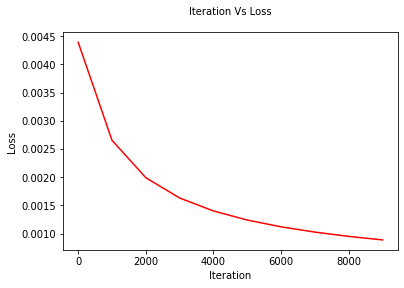

In [160]:
plt.title('Iteration Vs Loss\n',fontsize=10)
plt.plot(Iteration, Loss,'r-')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.savefig('NN_Loss.jpg')

In this implementation, I chose `sigmoid` function, $\sigma(x)=\frac{1}{1+e^{-x}}$  as a activation function. To perform the feed forward, I have taken the `dot` product between $X$ and $W^{(1)}$ as $z^{(2)}=XW^{(1)}$. Next, I have evaluated the sigmoid function at $z^{(2)}$ as $a=\sigma(z^{(2)})=\sigma(XW^{(1)})$. I have then multiplied the resulting functional evaluation, $a$ by the weights $W^{(2)}$, i.e. $ z^{(3)}=aW^{(2)}$. Last but not least, we have applied our activation function to $z^{(3)}$ which yields our estimate, $ \hat y=\sigma(z^{(3)})$. The following two equations were used to implement the backpropagation algorithm,

$\frac{\partial L}{\partial W^{(2)}}=a^T(-(y-\hat y))\sigma^{\prime}(z^{(3)})$ and 
$\frac{\partial L}{\partial W^{(1)}}=X^T(a^T(-(y-\hat y))\sigma^{\prime}(z^{(3)}))(W^{(2)})^{T}\sigma^{\prime}(z^{(2)})$
